In [3]:
#!/usr/bin/env python
# coding: utf-8

"""
Python打卡第十五天 - CS学生成绩数据分析
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置图表在Notebook中显示
%matplotlib inline
plt.style.use('ggplot')  # 使用ggplot风格美化图表

# 读取数据
file_path = 'CS Student Strength.csv'
df = pd.read_csv(file_path)

# 显示数据基本信息
print("数据集基本信息:")
print(f"行数: {df.shape[0]}, 列数: {df.shape[1]}")
print("\n前5行数据:")
print(df.head())

# 数据统计描述
print("\n数据统计描述:")
print(df.describe())

# 检查缺失值
print("\n缺失值统计:")
print(df.isnull().sum())

数据集基本信息:
行数: 8965, 列数: 25

前5行数据:
   Structured Programming  Structured programming (Sessional)   OOP  \
0                    3.50                                3.50  3.75   
1                    2.75                                2.75  3.50   
2                    2.00                                2.50  2.25   
3                    2.00                                3.25  2.75   
4                    3.50                                2.50  3.75   

   OOP (Sessional)  Discrete Math  Calculus  English Skill Development  \
0             3.50           4.00      4.00                       3.50   
1             3.75           2.50      2.25                       3.00   
2             3.50           3.75      2.25                       4.00   
3             3.50           2.00      2.00                       3.00   
4             4.00           3.50      3.25                       2.75   

   Data Structure  Data Structure (Sessional)  Algorithm  ...  \
0            3.75            


各科目平均成绩(从高到低):
DBMS                                  3.016537
Artificial Intelligence               3.016090
DBMS (Sessional)                      3.016035
Discrete Math                         3.014780
Operating Systems                     3.013190
Algorithm (Sessional)                 3.013134
OOP (Sessional)                       3.012911
Compiler Design                       3.011294
Operating Systems (Sessional)         3.010653
Thesis                                3.007724
Applied Statistics                    3.007250
Structured programming (Sessional)    3.007027
Calculus                              3.006804
Structured Programming                3.006748
Data Structure (Sessional)            3.006553
Data Structure                        3.006525
Computer Architecture                 3.006386
English Skill Development             3.005159
OOP                                   3.004518
Total Problems Solved                 3.004294
Theory of Computing                   3.0023

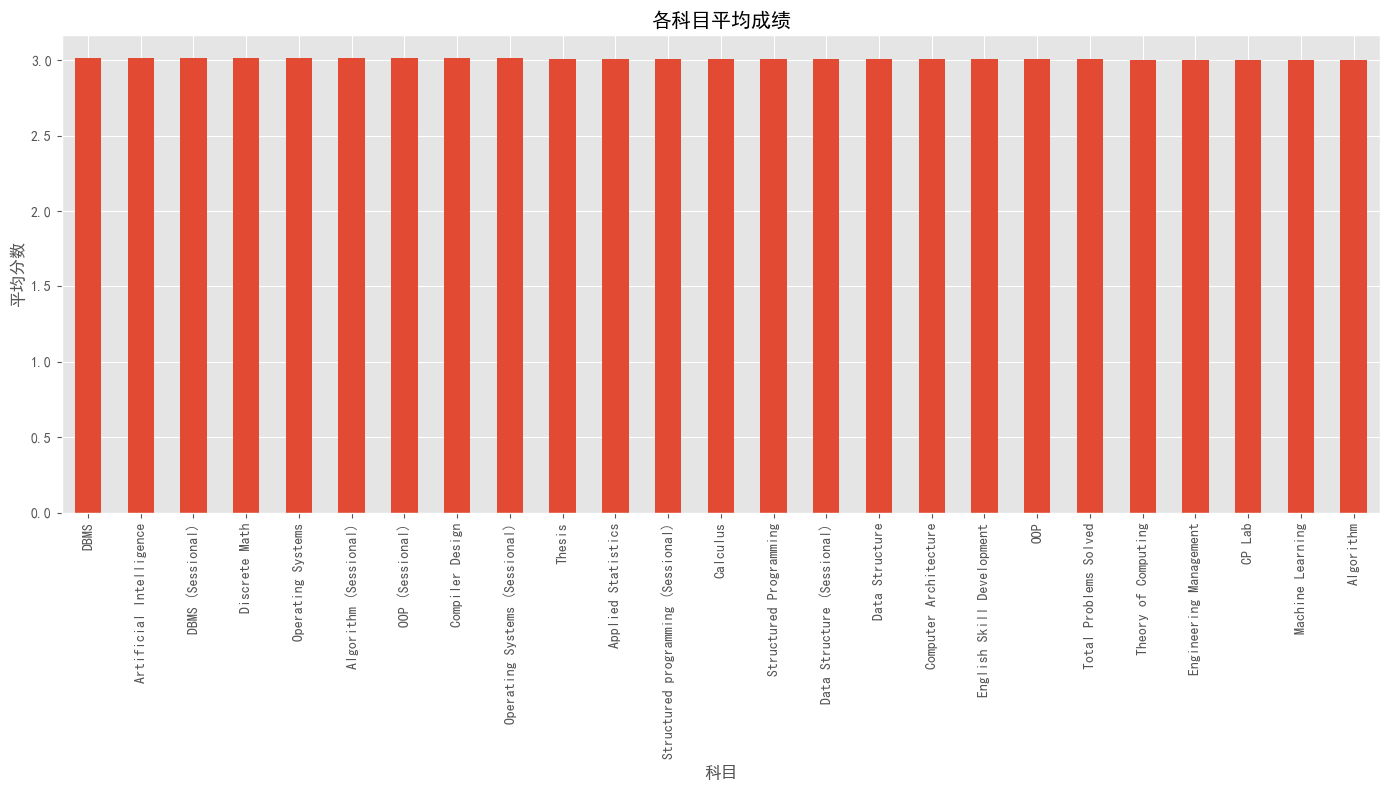

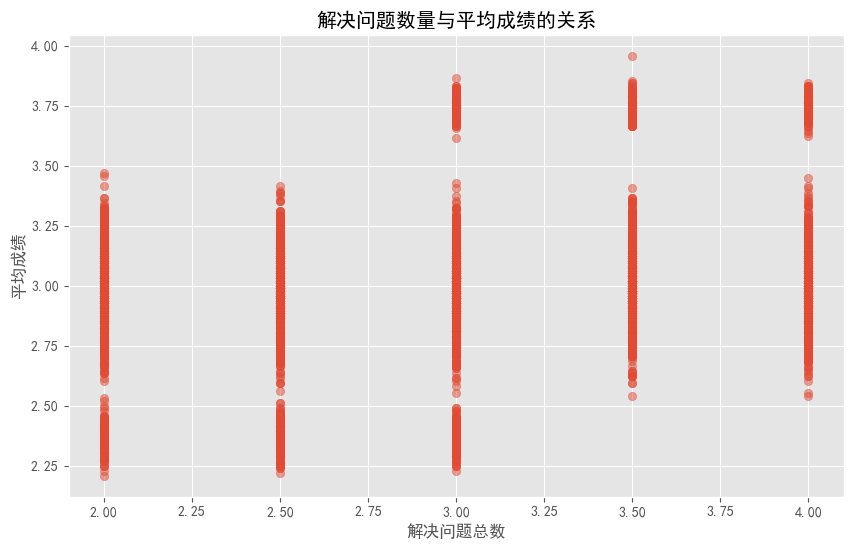


解决问题数量与平均成绩的相关系数: 0.2015


In [4]:
# 分析各科目平均成绩
avg_scores = df.mean().sort_values(ascending=False)
print("\n各科目平均成绩(从高到低):")
print(avg_scores)

# 可视化各科目平均成绩
plt.figure(figsize=(14, 8))
avg_scores.plot(kind='bar')
plt.title('各科目平均成绩')
plt.ylabel('平均分数')
plt.xlabel('科目')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 分析解决问题数量与成绩的关系
# 计算每个学生的平均成绩(不包括Total Problems Solved)
df['Average_Score'] = df.iloc[:, :-1].mean(axis=1)

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Problems Solved'], df['Average_Score'], alpha=0.5)
plt.title('解决问题数量与平均成绩的关系')
plt.xlabel('解决问题总数')
plt.ylabel('平均成绩')
plt.grid(True)
plt.show()

# 计算相关系数
correlation = df['Total Problems Solved'].corr(df['Average_Score'])
print(f"\n解决问题数量与平均成绩的相关系数: {correlation:.4f}")

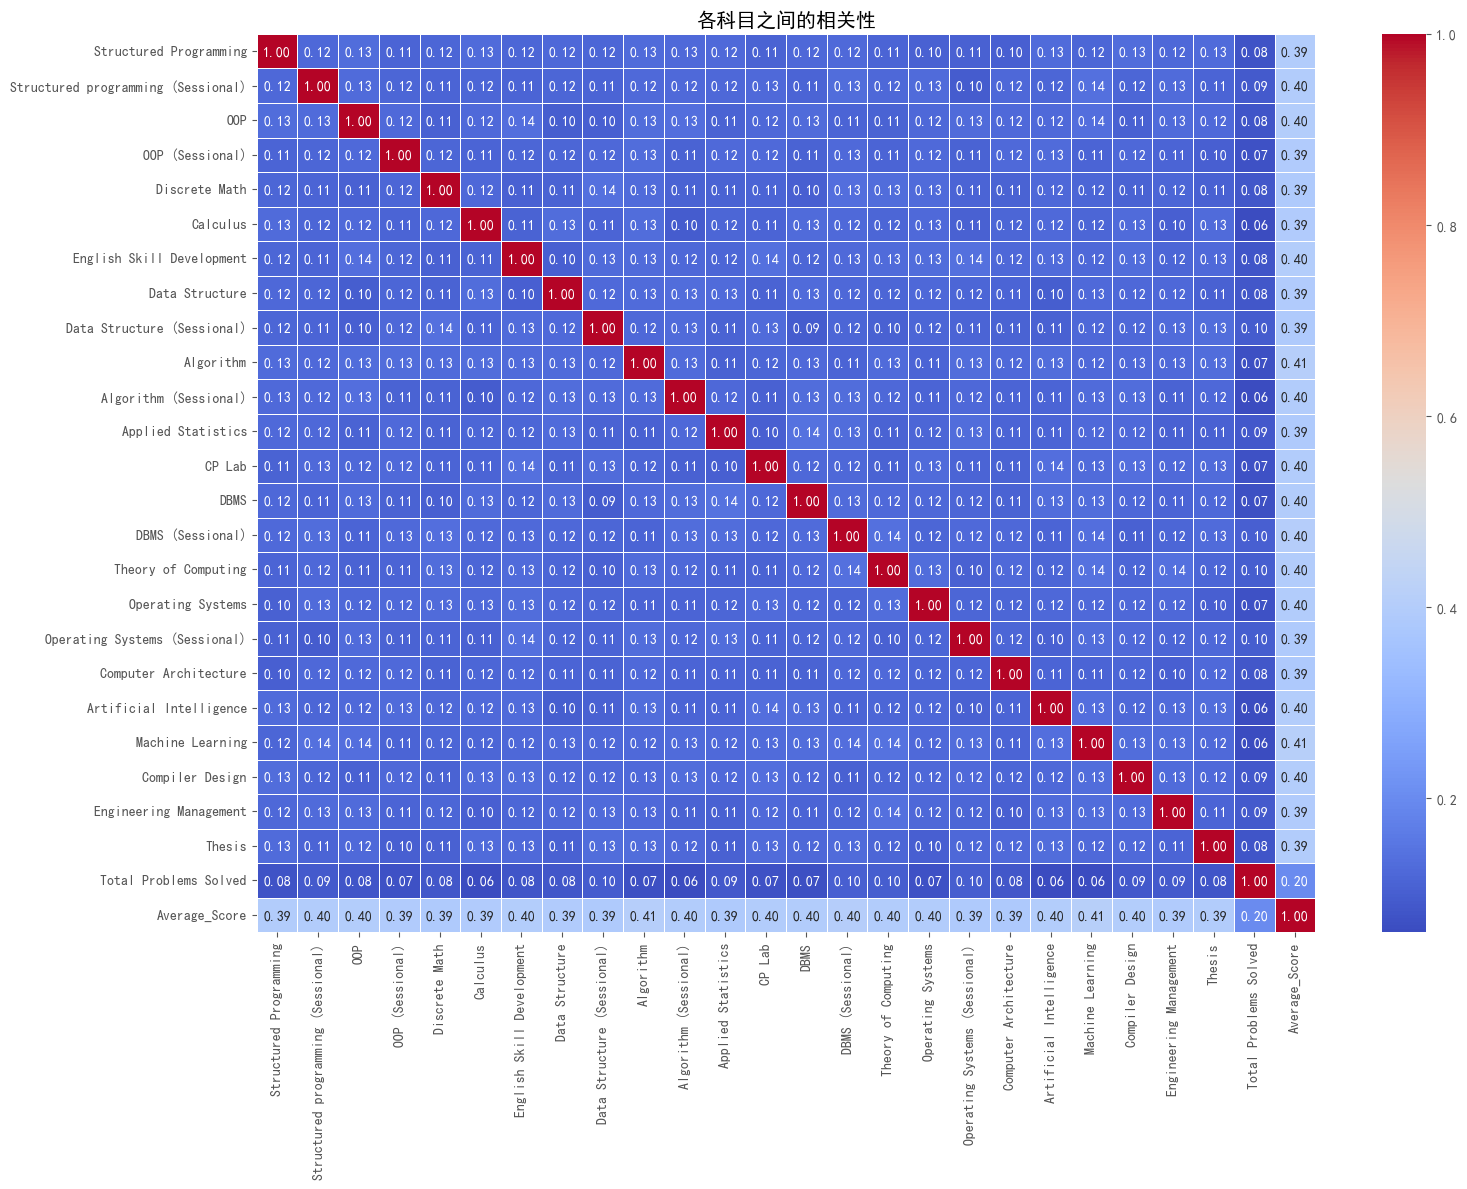


最强相关的科目对: Machine Learning 和 Average_Score, 相关系数: 0.4108


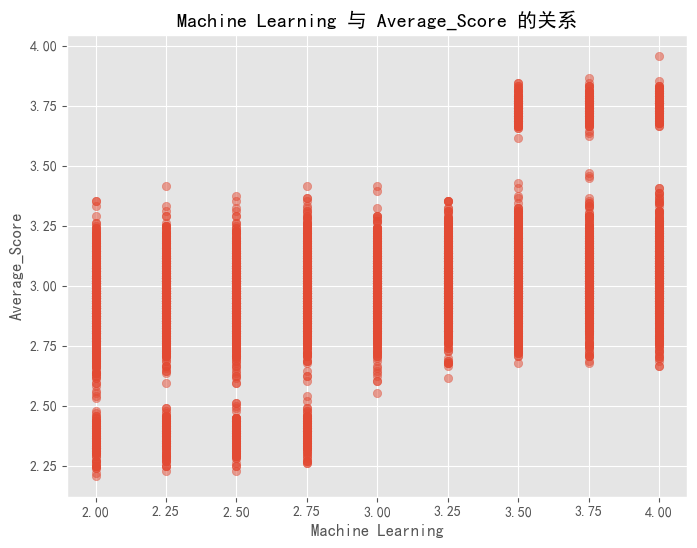

In [5]:
# 热图显示各科目之间的相关性
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('各科目之间的相关性')
plt.tight_layout()
plt.show()

# 找出最强相关的科目对
corr_matrix = df.corr().abs()
# 将对角线设为0
np.fill_diagonal(corr_matrix.values, 0)
# 获取最大相关系数及对应的科目对
max_corr = corr_matrix.max().max()
max_corr_subjects = np.where(corr_matrix == max_corr)
subject1 = corr_matrix.index[max_corr_subjects[0][0]]
subject2 = corr_matrix.columns[max_corr_subjects[1][0]]

print(f"\n最强相关的科目对: {subject1} 和 {subject2}, 相关系数: {max_corr:.4f}")

# 绘制这两个科目的散点图
plt.figure(figsize=(8, 6))
plt.scatter(df[subject1], df[subject2], alpha=0.5)
plt.title(f'{subject1} 与 {subject2} 的关系')
plt.xlabel(subject1)
plt.ylabel(subject2)
plt.grid(True)
plt.show()

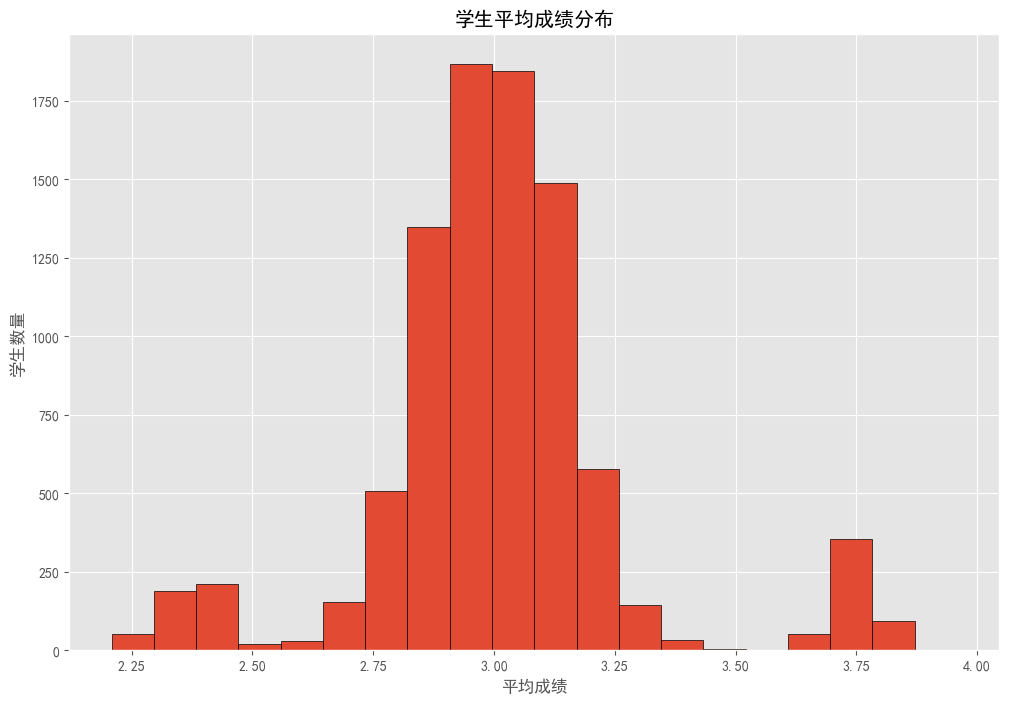


平均成绩最高的科目: DBMS, 平均分: 3.0165
平均成绩最低的科目: Algorithm, 平均分: 2.9997

学生最常见的优势科目(前5名):
Structured Programming                1164
Structured programming (Sessional)    1050
OOP                                    893
OOP (Sessional)                        784
Discrete Math                          630
dtype: int64

学生最常见的劣势科目(前5名):
Structured Programming                1183
Structured programming (Sessional)    1007
OOP                                    842
OOP (Sessional)                        762
Discrete Math                          640
dtype: int64


In [6]:
# 分析学生成绩分布
plt.figure(figsize=(12, 8))
df['Average_Score'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('学生平均成绩分布')
plt.xlabel('平均成绩')
plt.ylabel('学生数量')
plt.grid(True)
plt.show()

# 找出表现最好和最差的科目
best_subject = avg_scores.index[0]
worst_subject = avg_scores.index[-1]
print(f"\n平均成绩最高的科目: {best_subject}, 平均分: {avg_scores[0]:.4f}")
print(f"平均成绩最低的科目: {worst_subject}, 平均分: {avg_scores[-1]:.4f}")

# 分析学生的优势和劣势科目
# 计算每个学生的最高分和最低分科目
df_subjects = df.iloc[:, :-1]  # 排除Total Problems Solved列
student_best = df_subjects.idxmax(axis=1)
student_worst = df_subjects.idxmin(axis=1)

# 统计最常见的优势和劣势科目
best_count = student_best.value_counts().head(5)
worst_count = student_worst.value_counts().head(5)

print("\n学生最常见的优势科目(前5名):")
print(best_count)
print("\n学生最常见的劣势科目(前5名):")
print(worst_count)

In [7]:
# ====================== 模型训练与评估 ======================
print("\n开始模型训练与评估...")

# 导入必要的库
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 准备数据
# 使用所有科目成绩预测学生解决问题的能力
X = df.iloc[:, :-2]  # 所有科目成绩，不包括Total Problems Solved和Average_Score
y = df['Total Problems Solved']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


开始模型训练与评估...


In [8]:
# 创建不同的模型
models = {
    '线性回归': LinearRegression(),
    'Ridge回归': Ridge(alpha=1.0),
    'Lasso回归': Lasso(alpha=0.1),
    '随机森林': RandomForestRegressor(n_estimators=100, random_state=42),
    '梯度提升': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# 评估结果存储
results = {}

# 训练和评估模型
for name, model in models.items():
    # 训练模型
    model.fit(X_train_scaled, y_train)
    
    # 预测
    y_pred = model.predict(X_test_scaled)
    
    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # 交叉验证
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    # 存储结果
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std()
    }
    
    print(f"\n{name}模型评估结果:")
    print(f"均方误差(MSE): {mse:.4f}")
    print(f"均方根误差(RMSE): {rmse:.4f}")
    print(f"决定系数(R²): {r2:.4f}")
    print(f"5折交叉验证R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 找出表现最好的模型
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"\n表现最好的模型是: {best_model_name}, R² = {results[best_model_name]['R2']:.4f}")


线性回归模型评估结果:
均方误差(MSE): 0.4561
均方根误差(RMSE): 0.6753
决定系数(R²): 0.0397
5折交叉验证R²: 0.0372 ± 0.0150

Ridge回归模型评估结果:
均方误差(MSE): 0.4561
均方根误差(RMSE): 0.6753
决定系数(R²): 0.0397
5折交叉验证R²: 0.0372 ± 0.0150

Lasso回归模型评估结果:
均方误差(MSE): 0.4749
均方根误差(RMSE): 0.6892
决定系数(R²): -0.0001
5折交叉验证R²: -0.0002 ± 0.0003

随机森林模型评估结果:
均方误差(MSE): 0.4603
均方根误差(RMSE): 0.6784
决定系数(R²): 0.0308
5折交叉验证R²: 0.0395 ± 0.0130

梯度提升模型评估结果:
均方误差(MSE): 0.4540
均方根误差(RMSE): 0.6738
决定系数(R²): 0.0440
5折交叉验证R²: 0.0289 ± 0.0143

表现最好的模型是: 梯度提升, R² = 0.0440



特征重要性(随机森林):
                               Feature  Importance
1   Structured programming (Sessional)    0.043254
21                     Compiler Design    0.043015
13                                DBMS    0.042734
2                                  OOP    0.042488
9                            Algorithm    0.042235
15                 Theory of Computing    0.042201
16                   Operating Systems    0.042007
0               Structured Programming    0.041703
3                      OOP (Sessional)    0.041630
19             Artificial Intelligence    0.041617


<Figure size 1200x800 with 0 Axes>

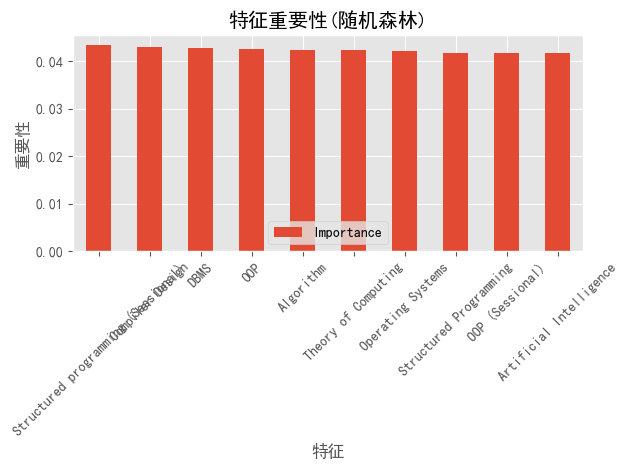

In [9]:
# 特征重要性分析（仅适用于树模型）
if '随机森林' in models and '随机森林' in results and results['随机森林']['R2'] > 0:
    # 获取特征重要性
    feature_importances = models['随机森林'].feature_importances_
    feature_names = X.columns
    
    # 创建特征重要性DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    # 打印特征重要性
    print("\n特征重要性(随机森林):")
    print(importance_df.head(10))  # 显示前10个最重要的特征
    
    # 可视化特征重要性
    plt.figure(figsize=(12, 8))
    importance_df.head(10).plot(kind='bar', x='Feature', y='Importance')
    plt.title('特征重要性(随机森林)')
    plt.xlabel('特征')
    plt.ylabel('重要性')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


预测学生平均成绩的模型...

使用梯度提升预测平均成绩:
均方误差(MSE): 0.0031
均方根误差(RMSE): 0.0560
决定系数(R²): 0.9561


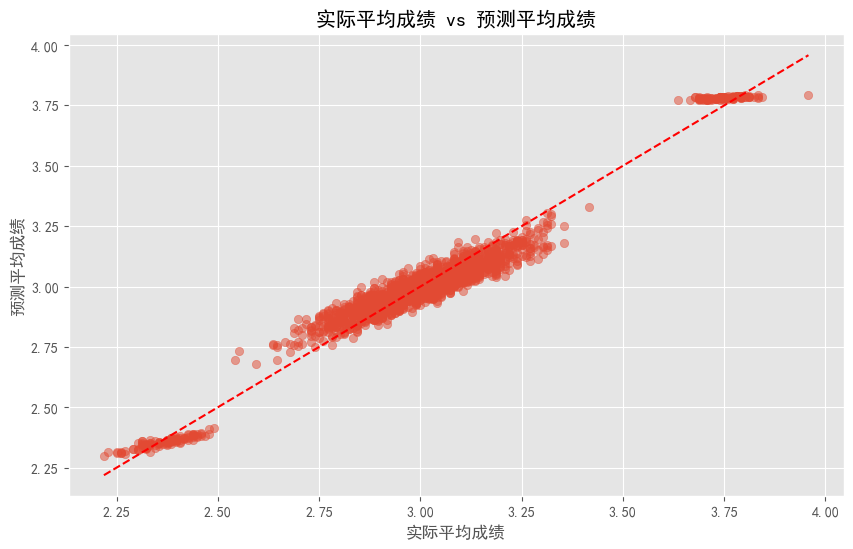


分析完成！


In [10]:
# 预测学生的平均成绩
print("\n预测学生平均成绩的模型...")

# 准备数据
X2 = df.drop(['Average_Score', 'Total Problems Solved'], axis=1)  # 所有科目成绩
y2 = df['Average_Score']  # 目标变量

# 划分训练集和测试集
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 特征标准化
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# 使用最佳模型
best_model = models[best_model_name]
best_model.fit(X2_train_scaled, y2_train)
y2_pred = best_model.predict(X2_test_scaled)

# 评估
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, y2_pred)

print(f"\n使用{best_model_name}预测平均成绩:")
print(f"均方误差(MSE): {mse2:.4f}")
print(f"均方根误差(RMSE): {rmse2:.4f}")
print(f"决定系数(R²): {r2_2:.4f}")

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, alpha=0.5)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')
plt.title('实际平均成绩 vs 预测平均成绩')
plt.xlabel('实际平均成绩')
plt.ylabel('预测平均成绩')
plt.grid(True)
plt.show()

print("\n分析完成！")